![alt text](pandas.png "Title")

# Dataframes filtering

In [1]:
import pandas as pd
import numpy as np

In [2]:
patients = [10010, 10011, 10012, 10013]
data = {'gender':   ['M', 'F', 'F', 'M'],
        'age':      [20, 40, 20, 45],
        'country':  ['USA', 'CH', 'BE', 'BE'],
        'race':     [20, 40, 20, 45],
        'screened': [True, True, False, False],
       }

df = pd.DataFrame(data, index= patients, columns=['age', 'country', 'gender', 'screened'])
df

,age,country,gender,screened
10010,20,USA,M,True
10011,40,CH,F,True
10012,20,BE,F,False
10013,45,BE,M,False


## Index filtering

In [3]:
df[df.index==10010]

,age,country,gender,screened
10010,20,USA,M,True


In [4]:
# Slice first and second rows
df[0:2]

,age,country,gender,screened
10010,20,USA,M,True
10011,40,CH,F,True


In [5]:
# Slice first 4 rows
df[:4]

,age,country,gender,screened
10010,20,USA,M,True
10011,40,CH,F,True
10012,20,BE,F,False
10013,45,BE,M,False


In [6]:
# Slice last row
df[-1:]

,age,country,gender,screened
10013,45,BE,M,False


In [7]:
# Slice every other record
df[::2]

,age,country,gender,screened
10010,20,USA,M,True
10012,20,BE,F,False


In [8]:
# Loc takes a index name nad return a Series with the whole row. Remenber, iloc works with index position 
df.loc[10010]

age           20
country      USA
gender         M
screened    True
Name: 10010, dtype: object

## Conditional filtering

**Option 1: Slicing with an array of booleans**

In [9]:
# Create a Series, applying the condition on each element of the age column (a Series itself)
df['age'] > 30 

10010    False
10011     True
10012    False
10013     True
Name: age, dtype: bool

In [10]:
# We can use this Series of boolean to slice the dataframe (not in-place):
df[ df['age'] > 30 ]

# The filter doesn't have to come from the same dataframe. It just need to be of the same length

,age,country,gender,screened
10011,40,CH,F,True
10013,45,BE,M,False


In [11]:
# ~ means 'not'. Notice the parentheses
df[ ~(df.age > 30) ]

,age,country,gender,screened
10010,20,USA,M,True
10012,20,BE,F,False


In [12]:
# when multiple clauses use the & | operators and parentheses:

# & means 'and'
df1 = df[ (df.age > 30) & (df.gender == 'F') ]

# | means 'or'
df2 = df[ (df.age > 30) | (df.gender == 'F') ]

In [13]:
# isin() is useful when using a list, or any iterable
df[ ~df.country.isin(['BE', 'CH']) ]  # Filtering where country is not BE or CH

,age,country,gender,screened
10010,20,USA,M,True


**Option 2: we can also use the query() method**

In [14]:
df1 = df.query ("age < 30 and gender=='F'")

# or more dynamically:
cut, gender = 30, 'F'
df.query (f"age < {cut} and gender =='{gender}'")

# query() is not in-place

,age,country,gender,screened
10012,20,BE,F,False


## Columns filtering

In [15]:
# List of columns:
print(df.columns)

# or even clearer
print( list(df.columns) ) # or df.columns.to_list()

Index(['age', 'country', 'gender', 'screened'], dtype='object')
['age', 'country', 'gender', 'screened']


In [16]:
# Subset of columns (not in-place), or to reorganize the column ordering:
df[ ['age','screened'] ]

,age,screened
10010,20,True
10011,40,True
10012,20,False
10013,45,False


In [17]:
# Alternatively, drop the columns you don't want to keep. Also not in-place. 
df.drop( ['gender'], axis = 1) # axis = 0 would drop rows instead of columns

,age,country,screened
10010,20,USA,True
10011,40,CH,True
10012,20,BE,False
10013,45,BE,False


## Using functions

In [18]:
# df with a thousand random numbers as per standard normal distribution.
df2 = pd.DataFrame(np.random.randn(1000,1), columns=['n'])
df2.head() # show only 5 records

,n
0,0.204572
1,0.899661
2,0.603465
3,-0.407462
4,0.787435


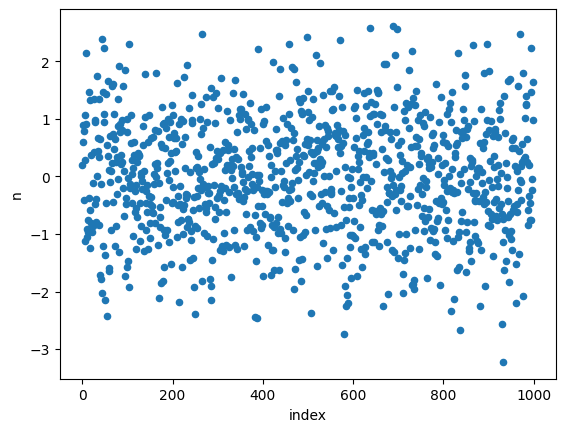

In [19]:
# By the way, you can plot things quickly
%matplotlib inline
df2['index']= df2.index
df2.plot.scatter(x='index', y='n')
del df2['index']

In [20]:
# Filter dataframe where absolute value is higher than 2.5
df2[ (np.abs(df2['n']) > 2.5)].head()

,n
580,-2.729630
638,2.584828
688,2.616823
697,2.561096
836,-2.661857


## Misc

In [21]:
df

,age,country,gender,screened
10010,20,USA,M,True
10011,40,CH,F,True
10012,20,BE,F,False
10013,45,BE,M,False


In [22]:
# For filter on strings (including Regex) we use the str accessor, which has a lot of methods
df[df['country'].str.contains('U')]

,age,country,gender,screened
10010,20,USA,M,True


In [23]:
# filter() works on the column labels
df.filter(items=['age'])

,age
10010,20
10011,40
10012,20
10013,45


In [24]:
df.filter(like='scr')

,screened
10010,True
10011,True
10012,False
10013,False


__________________________________________________
Nicolas Dupuis, Methodology and Innovation (IDAR C&SP), 2020+